<a href="https://colab.research.google.com/github/solishiguera/M2-E1/blob/main/Evidencia1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evidencia 1
## Modelo
Durante esta práctica, se desarrollará un modelo de regresión lineal de primer orden.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")  
!pwd

Mounted at /content/gdrive
/content


In [2]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/SEMESTRE_7/Modulo2/Evidencia1"
!ls

/content/gdrive/MyDrive/Colab Notebooks/SEMESTRE_7/Modulo2/Evidencia1
'Copy of Ses03_Practice.ipynb'	 starbucks-menu-nutrition-drinks.csv
 Evidencia1.ipynb


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

## Dataset
Para esta evidencia, utilizaré el data set de los valores nutricionales de las bebidas de starbucks. [Data set en Kaggle](https://www.kaggle.com/datasets/starbucks/starbucks-menu)

### Preparación y limpieza de datos

In [5]:
df = pd.read_csv('starbucks-menu-nutrition-drinks.csv')
df.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


Se eliminan filas que contengan valores de tipo '-'

In [30]:
df = df[df['Calories'] != '-']
df = df[df['Calories'] != '0']

In [32]:
cols = ['Calories',	'Fat (g)',	'Carb. (g)',	'Fiber (g)',	'Protein',	'Sodium']
for i in cols :
  df[i] = df[i].astype(float)

### Base de datos lista

In [33]:
# df.dtypes

Unnamed: 0     object
Calories      float64
Fat (g)       float64
Carb. (g)     float64
Fiber (g)     float64
Protein       float64
Sodium        float64
dtype: object

In [36]:
# df.shape

(90, 7)

## Implementación de modelo

#### División de datos
Utilizaremos el 70% de nuestros datos para entrenamiento (63 filas) y 30% para validación (27 filas)

In [142]:
calories = df['Calories'].copy()
carbs = df['Carb. (g)'].copy()

x_train = carbs[63:]
y_train = calories[63:]

x_validate = carbs[:63]
y_validate = calories[:63]

### Definición de parámetros
Primeramente, definimos una tasa de aprendizaje (alpha) de 0.00001 para nuestra Gradiente Descendente.

In [82]:
alpha = 0.00001

# Función de hipótesis
h = lambda x,theta: theta[0]+theta[1]*x

# Gradiente Descendente
j_i = lambda x,y,theta: (y-h(x,theta))**2 

n = len(y_train)

### Iteraciones del modelo
Iniciamos corriendo nuestro modelo 1,000 iteraciones, y este encontrará los valores de theta 0 y theta 1 que mejor se ajusten a los datos.

In [155]:
theta = [1,1] # Cambiar dependiendo del orden del modelo (un theta para cada dimensión de nuestros datos + 1)

for idx in range(10000):
  acumDelta = []
  acumDeltaX = []
  for x_i, y_i in zip(x_train,y_train):

    acumDelta.append(h(x_i,theta)-y_i)
    acumDeltaX.append((h(x_i,theta)-y_i)*x_i)

  sJt0 = sum(acumDelta)  
  sJt1 = sum(acumDeltaX)
  theta[0] = theta[0]-alpha/n*sJt0
  theta[1] = theta[1]-alpha/n*sJt1


### Función de costo
En el siguiente apartado, calculamos la función de costo para nuestros dos datasets: El dataset de entrenamiento y el de validación. Con este podemos determinar la manera en la que se ajusta nuestro modelo. Además, se despliegan ambas funciones de costo así como theta 0 y theta 1.

In [154]:
n_train = len(y_train)
n_validate = len(y_validate)

# Validación
acumDelta = []
for x_i, y_i in zip(x_validate,y_validate):
  acumDelta.append(j_i(x_i,y_i,theta))  

sDelta = sum(acumDelta)  
J_validate = 1/(2*n_validate)*sDelta


# Training
acumDelta = []
for x_i, y_i in zip(x_train,y_train):
  acumDelta.append(j_i(x_i,y_i,theta))  

sDelta = sum(acumDelta)  
J_train = 1/(2*n_train)*sDelta

print('{} {:.2f}'.format('Función de costo para data set de validación: ', J_validate))
print('{} {:.2f}'.format('Función de costo para data set de entrenamiento:', J_train))
print('Theta 0: {:.2f} \nTheta 1: {:.2f}'.format(theta[0], theta[1]))

Función de costo para data set de validación:  1555.58
Función de costo para data set de entrenamiento: 971.14
Theta 0: 2.38 
Theta 1: 6.22


### Graficando resultados
* Variables
  * Variable dependiente (Y) : Calorías
  * Variable independiente (X) : Carbohidratos
En este apartado, graficamos nuestro modelo obtenido. 
* Como podemos observar, se calcula el valor estimado para nuestros dos datasets y se grafican.
* Vemos como nuestro dataset de validación está de color naranja, y los valores que se predicen son de color azul.
* Por otro lado, nuestro dataset de entrenamiento se muestra de color amarillo, mientras que los valores que se predicen son de color verde.
* Por último, observamos una línea roja punteada que representa nuestro modelo de regresión lineal de 1er orden. 


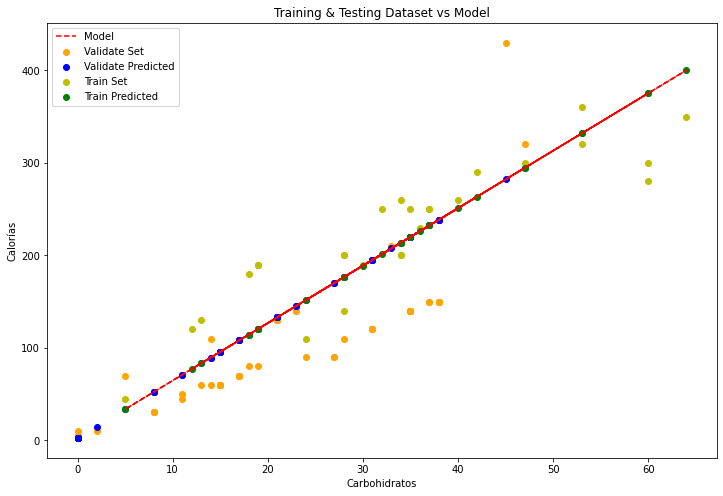

In [141]:
plot_train_x = x_train.values.tolist()
plot_train_y = y_train.values.tolist()

plot_validate_x = x_validate.values.tolist()
plot_validate_y = y_validate.values.tolist()

plot_test_y = []
plot_test_y_2 = []

for i in plot_validate_x:
  plot_test_y.append(theta[1] * i + theta[0])

for j in plot_train_x :
  plot_test_y_2.append(theta[1] * j + theta[0])

plt.figure(figsize=(12,8))

plt.scatter(plot_validate_x, plot_validate_y,color = 'orange', label='Validate Set')
plt.scatter(plot_validate_x, plot_test_y, color='b', label='Validate Predicted')
plt.scatter(plot_train_x, plot_train_y, color='y', label='Train Set')
plt.scatter(plot_train_x, plot_test_y_2, color='g', label='Train Predicted')
plt.plot(plot_train_x, plot_test_y_2, '--r', label=f'Model')

plt.title('Training & Testing Dataset vs Model')
plt.xlabel('Carbohidratos')
plt.ylabel('Calorías')

plt.legend()
plt.show()